This file was used to fix some minor issues we had while extracting duration anomalies

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib 
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
from multiprocessing import Process, Queue
queue = Queue()
import random
from matplotlib.pyplot import figure
import math

In [2]:
def read_df(file_title,house_nb):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df,house_nb)
    except:
        return(None)

In [18]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Resampled/fridge_freezer/house_"+str(i+1)+".csv",i+1) for i in range(21)))
Refit_fridge_freezers={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_fridge_freezers[result[i][1]]=result[i][0]

In [19]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Resampled/fridge/house_"+str(i+1)+".csv",i+1) for i in range(21)))
Refit_fridges={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_fridges[result[i][1]]=result[i][0]

In [20]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['beginning', 'end','label']]
    activation = [tuple(x[0:2]) for x in df.to_numpy()]
    activation_type = [x[2] for x in df.to_numpy()]
    return(activation,activation_type)

In [59]:
Refit_fridge_freezer_activation_type={}
Refit_fridge_freezer_activations={}
for house_nb in range(22):
    try:
        Refit_fridge_freezer_activations[house_nb]=csv_to_activations("Refit_activations/labels/fridge_freezer_revertBack/house_"+str(house_nb))[0]
        Refit_fridge_freezer_activation_type[house_nb]=csv_to_activations("Refit_activations/labels/fridge_freezer_revertBack/house_"+str(house_nb))[1]
    except:
        None

In [60]:
Refit_fridge_activation_type={}
Refit_fridge_activations={}
for house_nb in range(22):
    try:
        Refit_fridge_activations[house_nb]=csv_to_activations("Refit_activations/labels/fridge_revertBack/house_"+str(house_nb))[0]
        Refit_fridge_activation_type[house_nb]=csv_to_activations("Refit_activations/labels/fridge_revertBack/house_"+str(house_nb))[1]
    except:
        None

In [23]:
def normal_anomolous(activations,activation_type,house_nb):
    normal_activations=[]
    anomolous_activations=[]
    for i in range(len(activations)):
        if activation_type[i]==0:
            normal_activations.append(activations[i])
        else:
            anomolous_activations.append(activations[i])
    return(normal_activations,anomolous_activations,house_nb)

In [61]:
Refit_fridge_freezer_normal_activations={}
Refit_fridge_freezer_anomolous_activations={}
for house_nb in Refit_fridge_freezer_activations.keys():
    result=normal_anomolous(Refit_fridge_freezer_activations[house_nb],Refit_fridge_freezer_activation_type[house_nb],house_nb)
    Refit_fridge_freezer_normal_activations[house_nb]=result[0]
    Refit_fridge_freezer_anomolous_activations[house_nb]=result[1]

In [62]:
Refit_fridge_normal_activations={}
Refit_fridge_anomolous_activations={}
for house_nb in Refit_fridge_activations.keys():
    result=normal_anomolous(Refit_fridge_activations[house_nb],Refit_fridge_activation_type[house_nb],house_nb)
    Refit_fridge_normal_activations[house_nb]=result[0]
    Refit_fridge_anomolous_activations[house_nb]=result[1]

In [63]:
def get_durations(activations):
    durations=[]
    for activation in activations:
        durations.append(round((activation[1]-activation[0])/6))
    return (durations)

In [64]:
Refit_fridge_freezers_durations=[]
Refit_fridge_freezers_anomolous_durations=[]
for house in Refit_fridge_freezer_normal_activations.keys():
    Refit_fridge_freezers_durations.append(get_durations(Refit_fridge_freezer_normal_activations[house]))
    Refit_fridge_freezers_anomolous_durations.append(get_durations(Refit_fridge_freezer_anomolous_activations[house]))

In [65]:
Refit_fridge_durations=[]
Refit_fridge_anomolous_durations=[]
for house in Refit_fridge_normal_activations.keys():
    Refit_fridge_durations.append(get_durations(Refit_fridge_normal_activations[house]))
    Refit_fridge_anomolous_durations.append(get_durations(Refit_fridge_anomolous_activations[house]))

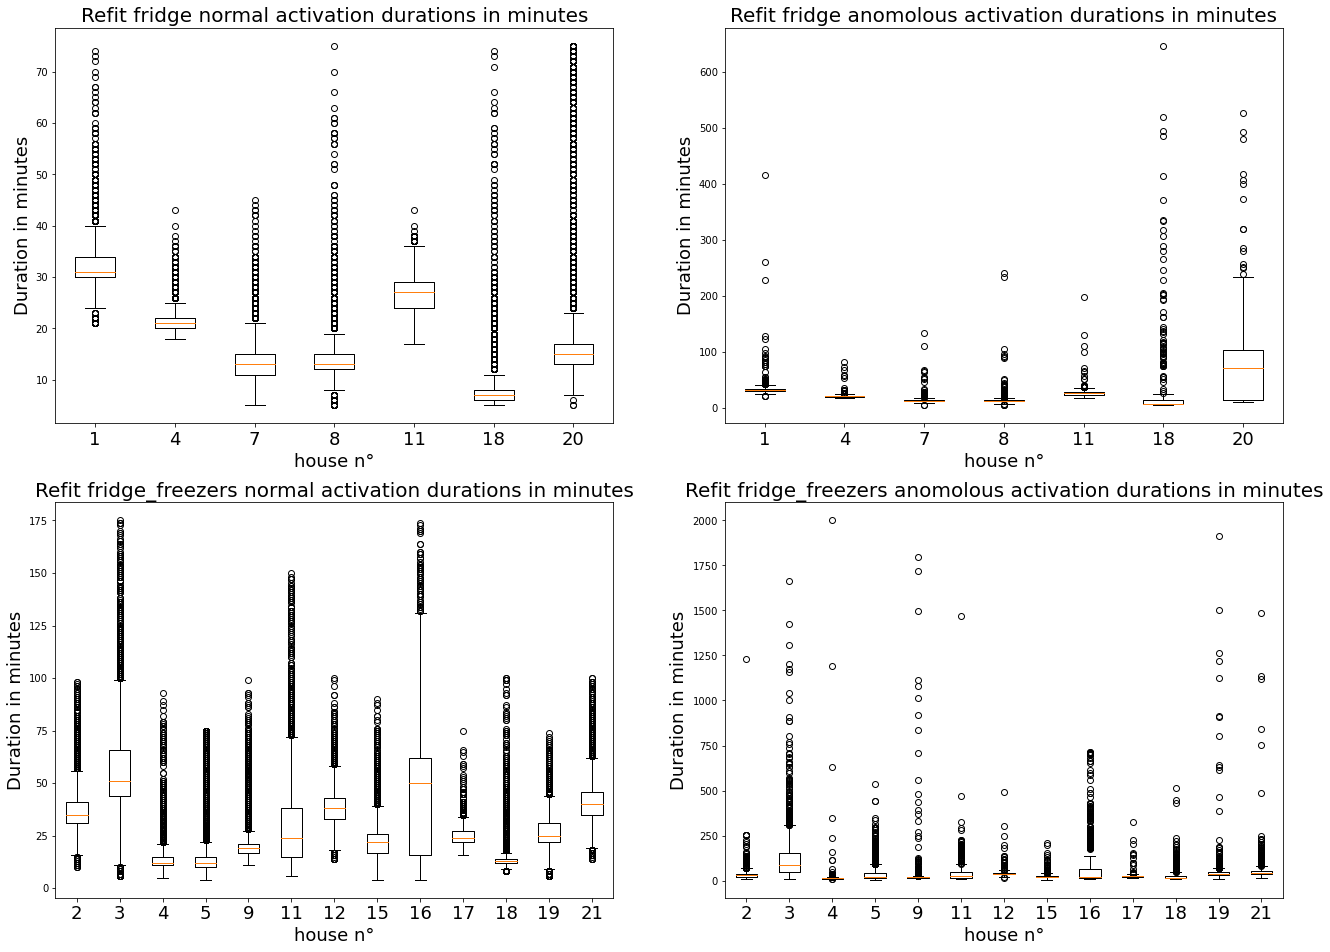

In [66]:
fig, ax= plt.subplots(2,2,figsize=(22,16))

ax[0,0].set_title('Refit fridge normal activation durations in minutes',fontsize=20)
ax[0,0].boxplot(Refit_fridge_durations,vert=True)
#ax[0,0].set_ylim(0,100)
ax[0,0].set_xticklabels(Refit_fridges.keys(),fontsize=18)
ax[0,0].set_xlabel('house n°', fontsize=18)
ax[0,0].set_ylabel('Duration in minutes', fontsize=18)
#ax[0,0].setp(ax[0,0].get_yticklabels(), fontsize=15)

ax[0,1].set_title('Refit fridge anomolous activation durations in minutes',fontsize=20)
ax[0,1].boxplot(Refit_fridge_anomolous_durations,vert=True)
#ax[0,1].set_ylim(0,100)
ax[0,1].set_xticklabels(Refit_fridges.keys(),fontsize=18)
ax[0,1].set_xlabel('house n°', fontsize=18)
ax[0,1].set_ylabel('Duration in minutes', fontsize=18)
#plt.setp(ax[0,1].get_yticklabels(), fontsize=15)

ax[1,0].set_title('Refit fridge_freezers normal activation durations in minutes',fontsize=20)
ax[1,0].boxplot(Refit_fridge_freezers_durations,vert=True)
#ax[1,0].set_ylim(0,100)
ax[1,0].set_xticklabels(Refit_fridge_freezer_normal_activations.keys(),fontsize=18)
ax[1,0].set_xlabel('house n°', fontsize=18)
ax[1,0].set_ylabel('Duration in minutes', fontsize=18)
#plt.setp(ax[1,0].get_yticklabels(), fontsize=15)

ax[1,1].set_title('Refit fridge_freezers anomolous activation durations in minutes',fontsize=20)
ax[1,1].boxplot(Refit_fridge_freezers_anomolous_durations,vert=True)
#ax[1,1].set_ylim(0,100)
ax[1,1].set_xticklabels(Refit_fridge_freezer_normal_activations.keys(),fontsize=18)
ax[1,1].set_xlabel('house n°', fontsize=18)
ax[1,1].set_ylabel('Duration in minutes', fontsize=18)
#plt.setp(ax[1,1].get_yticklabels(), fontsize=15)


#plt.savefig('Number_Consumption_fridge_freezers.jpg',dpi=184)
plt.show()

In [46]:
for key in Refit_fridge_freezer_activations.keys():
    activations=Refit_fridge_freezer_activations[key]
    types=Refit_fridge_freezer_activation_type[key]
    durations=get_durations(activations)
    Refit_fridge_freezer_activations[key]=[]
    Refit_fridge_freezer_activation_type[key]=[]
    for i in range(len(activations)):
        if durations[i]<=2000:
            Refit_fridge_freezer_activations[key].append(activations[i])
            Refit_fridge_freezer_activation_type[key].append(types[i])

In [47]:
for key in Refit_fridge_activations.keys():
    activations=Refit_fridge_activations[key]
    types=Refit_fridge_activation_type[key]
    durations=get_durations(activations)
    Refit_fridge_activations[key]=[]
    Refit_fridge_activation_type[key]=[]
    for i in range(len(activations)):
        if durations[i]<=800:
            Refit_fridge_activations[key].append(activations[i])
            Refit_fridge_activation_type[key].append(types[i])

In [55]:
def activations_to_csv(activations,activation_type,house_nb):
    df=pd.DataFrame(activations, columns =['beginning','end'])
    df1 = pd.DataFrame(activation_type, columns =['label'])
    df_row = pd.concat([df, df1],axis=1)
    df_row.to_csv("Refit_activations/labels/fridge_freezer_revertBack/house_"+str(house_nb),index=False)

In [56]:
for i in Refit_fridge_freezer_activation_type.keys():
    activations_to_csv(Refit_fridge_freezer_activations[i],Refit_fridge_freezer_activation_type[i],i)

In [57]:
def activations_to_csv(activations,activation_type,house_nb):
    df=pd.DataFrame(activations, columns =['beginning','end'])
    df1 = pd.DataFrame(activation_type, columns =['label'])
    df_row = pd.concat([df, df1],axis=1)
    df_row.to_csv("Refit_activations/labels/fridge_revertBack/house_"+str(house_nb),index=False)

In [58]:
for i in Refit_fridge_activation_type.keys():
    activations_to_csv(Refit_fridge_activations[i],Refit_fridge_activation_type[i],i)